# Via expressa para ônibus urbano

In [1]:
from _thread import *
from IPython.display import IFrame

import random
import threading
import osmnx as ox
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Configuração para o algoritmo genético

In [2]:
totGeracoes  = 500
tamPopulacao = 50
recebeAjuda  = False

SelecionartipoBusca = 1  # 1-OneMax outro valor DFS

indCruzamento = 5
CXPB = 0.5
MUTPB = 0.1
PROB_MUTACAO = 0.1
SEED_RANDOM = 64
#minimoAceitavel = 1

#pontuação baixo será eliminada do grafo
removerPior = 0


# Formato Imagens

In [3]:
'''
    Formatos Suportados salvar rotas e mapas: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz 
'''
formato_imgs = 'pdf'

# Configuração da Imagens


In [4]:
'''
    configuração da imagens
'''
edge_color = "#000000"     # cor da aresta
bgcolor    = "#D3D3D3"     # cor do background
node_color = "#9370DB"     # cor da vértice
node_size  = 20            # Tamanho do vértice
fig_height = 20            # altura figura
fig_width  = 20            # largura figura

# Localização para a biblioteca OSMNX gerar o Grafo

In [5]:
place = 'Boa Vista, Roraima, BR'
Raio_distancia = 15000

G = ox.graph_from_address( place, network_type='drive', simplify=True, distance=Raio_distancia )

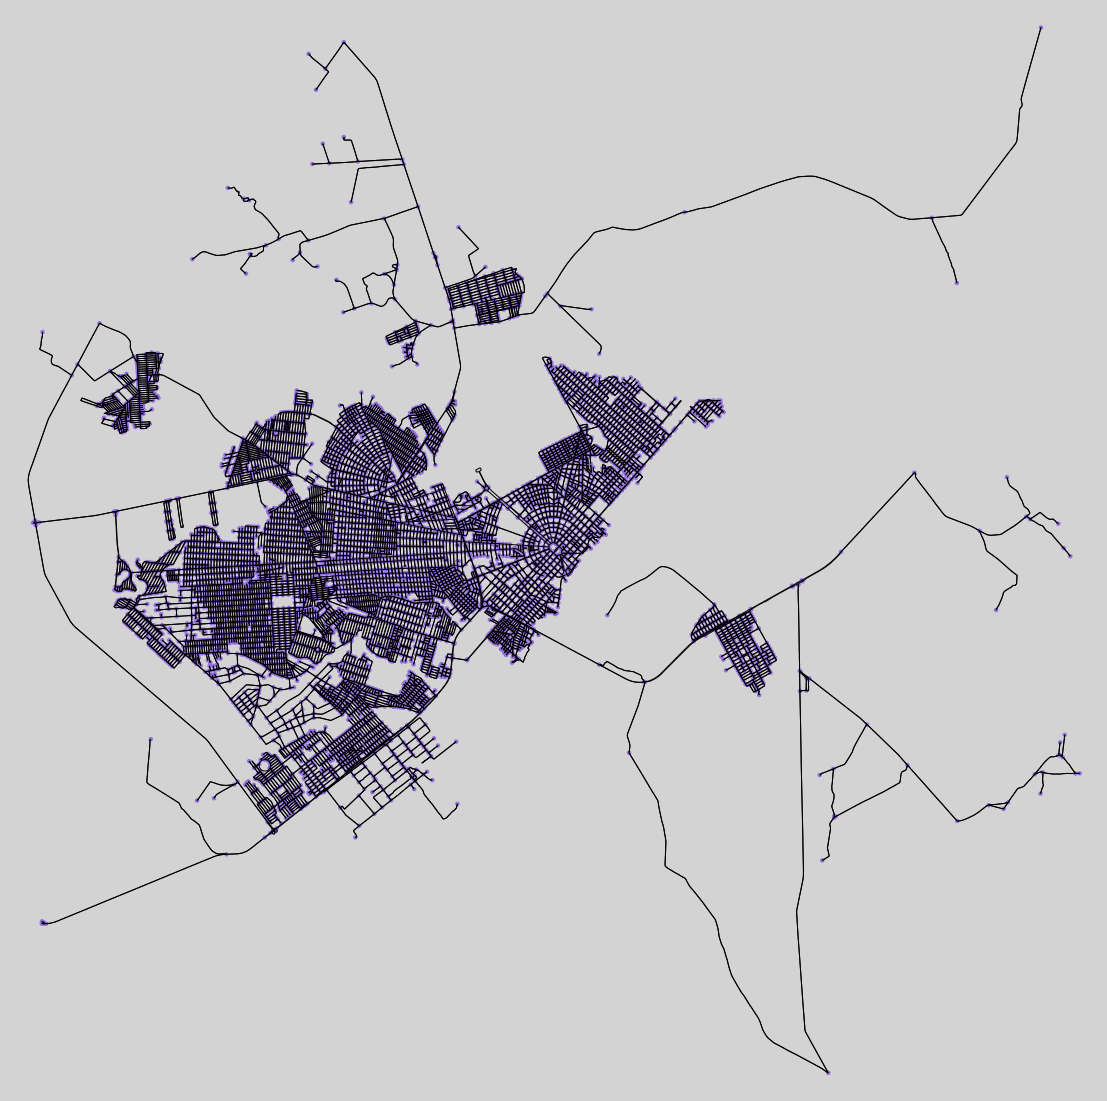

(<Figure size 1440x1440 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7efe20bdcd68>)

In [6]:
ox.plot_graph(G, fig_height=fig_height, fig_width=fig_width, edge_color=edge_color, bgcolor=bgcolor, node_color=node_color, node_size=node_size, filename="mapaCompleto", save=True, file_format=formato_imgs)

# Vértice que representa o terminal de ônibus

In [7]:
nodosCentroCivico = ( 3648084763, 3648084762 )

# Extrai as informações das via do Grafo G

In [8]:
listaDados = []

dado = G.adj
for i in dado:
    for j in dado[i]:
        for k in dado[i][j]:
            print()
            print(dado[i][j][k])
            h = []
            h.append(i)
            h.append(j)
            h.append(dado[i][j][k])
            listaDados.append(h)


{'osmid': 348047232, 'oneway': True, 'name': 'Avenida A', 'highway': 'residential', 'length': 336.357}

{'osmid': 519374475, 'oneway': True, 'name': 'Avenida Pérola', 'highway': 'residential', 'length': 13.196}

{'osmid': 348047241, 'name': 'Avenida Normandia', 'highway': 'residential', 'oneway': False, 'length': 75.151}

{'osmid': 348049270, 'name': 'Rua José Maria Carneiro', 'highway': 'residential', 'oneway': False, 'length': 159.901}

{'osmid': 348047241, 'name': 'Avenida Normandia', 'highway': 'residential', 'oneway': False, 'length': 60.983999999999995, 'geometry': <shapely.geometry.linestring.LineString object at 0x7efe25b99c88>}

{'osmid': 348047239, 'oneway': True, 'name': 'Avenida Uiramutã', 'highway': 'residential', 'length': 68.246}

{'osmid': 348049270, 'name': 'Rua José Maria Carneiro', 'highway': 'residential', 'oneway': False, 'length': 9.175}

{'osmid': 348049270, 'name': 'Rua José Maria Carneiro', 'highway': 'residential', 'oneway': False, 'length': 159.901}

{'osmid

{'osmid': 91888142, 'oneway': True, 'name': 'Avenida Surumu', 'highway': 'tertiary', 'length': 7.538}

{'osmid': 157946545, 'oneway': True, 'name': 'Avenida Sebastião Diniz', 'highway': 'secondary', 'length': 91.902}

{'osmid': 91888142, 'oneway': True, 'name': 'Avenida Surumu', 'highway': 'tertiary', 'length': 145.062}

{'osmid': 157946545, 'oneway': True, 'name': 'Avenida Sebastião Diniz', 'highway': 'secondary', 'length': 10.237}

{'osmid': 335971369, 'oneway': True, 'name': 'Avenida Sebastião Diniz', 'highway': 'secondary', 'length': 10.161}

{'osmid': 91888142, 'oneway': True, 'name': 'Avenida Surumu', 'highway': 'tertiary', 'length': 137.864, 'geometry': <shapely.geometry.linestring.LineString object at 0x7efe1cc55f98>}

{'osmid': 158464727, 'oneway': False, 'name': 'Rua Itália', 'highway': 'residential', 'length': 8.612}

{'osmid': 158464727, 'oneway': False, 'name': 'Rua Itália', 'highway': 'residential', 'length': 147.516}

{'osmid': 457755939, 'oneway': True, 'name': 'Avenida

{'osmid': 159980609, 'name': 'Rua das Acácias', 'highway': 'residential', 'oneway': False, 'length': 52.181}

{'osmid': 159980609, 'name': 'Rua das Acácias', 'highway': 'residential', 'oneway': False, 'length': 207.996}

{'osmid': 719517713, 'name': 'Rua Sagitário', 'highway': 'residential', 'oneway': False, 'length': 67.107}

{'osmid': 159992045, 'name': 'Rua Sagitário', 'highway': 'residential', 'oneway': False, 'length': 66.279}

{'osmid': 159992050, 'name': 'Rua das Margaridas', 'highway': 'residential', 'oneway': False, 'length': 114.64}

{'osmid': [159992050, 158441484], 'name': ['Rua das Margaridas', 'Rua Sagitário'], 'highway': 'residential', 'oneway': False, 'length': 110.39099999999999, 'geometry': <shapely.geometry.linestring.LineString object at 0x7efe1cbdda58>}

{'osmid': 159980617, 'name': 'Rua Flamboain', 'highway': 'residential', 'oneway': False, 'length': 164.685}

{'osmid': 159980628, 'name': 'Rua Ursa Maior', 'highway': 'residential', 'oneway': False, 'length': 64.92

{'osmid': 158858762, 'name': 'Rua Piauí', 'highway': 'residential', 'oneway': False, 'length': 55.886}

{'osmid': 158858748, 'name': 'Rua Brasília', 'highway': 'residential', 'oneway': False, 'length': 59.907}

{'osmid': 368957887, 'name': 'Rua Brasília', 'highway': 'residential', 'oneway': False, 'length': 19.0}

{'osmid': 368957888, 'oneway': True, 'name': 'Avenida Amazonas', 'highway': 'secondary', 'length': 18.563}

{'osmid': 518089678, 'oneway': True, 'name': 'Avenida Rio de Janeiro', 'highway': 'tertiary', 'length': 55.214}

{'osmid': 696010035, 'oneway': True, 'name': 'Avenida Minas Gerais', 'highway': 'tertiary', 'length': 12.562}

{'osmid': 719059437, 'name': 'Rua Campos dos Palmares', 'highway': 'tertiary', 'oneway': False, 'length': 95.604}

{'osmid': 730900585, 'oneway': False, 'name': 'Rua Guararapes', 'highway': 'tertiary', 'maxspeed': '60', 'access': 'yes', 'length': 117.021}

{'osmid': 158379201, 'oneway': False, 'name': 'Rua Campos dos Palmares', 'highway': 'residentia


{'osmid': 669592398, 'highway': 'residential', 'oneway': False, 'length': 162.62}

{'osmid': 160371253, 'highway': 'residential', 'oneway': False, 'length': 87.11}

{'osmid': 160371253, 'highway': 'residential', 'oneway': False, 'length': 87.588}

{'osmid': 669592398, 'highway': 'residential', 'oneway': False, 'length': 162.62}

{'osmid': 160371212, 'highway': 'residential', 'oneway': False, 'length': 63.34}

{'osmid': 160371212, 'highway': 'residential', 'oneway': False, 'length': 93.369}

{'osmid': 545702025, 'highway': 'residential', 'oneway': False, 'length': 165.609}

{'osmid': 160371224, 'highway': 'residential', 'oneway': False, 'length': 32.337}

{'osmid': 655366729, 'oneway': True, 'ref': 'BR-401', 'highway': 'primary', 'length': 470.522}

{'osmid': 160371225, 'highway': 'unclassified', 'oneway': False, 'length': 30.668}

{'osmid': 655366729, 'oneway': True, 'ref': 'BR-401', 'highway': 'primary', 'length': 99.046}

{'osmid': 160371231, 'highway': 'residential', 'oneway': Fals

{'osmid': 721771081, 'name': 'Rua Capitão Clóvis da Costa', 'highway': 'tertiary', 'maxspeed': '60', 'oneway': False, 'length': 60.842}

{'osmid': 160350879, 'name': 'Travessa São José', 'highway': 'residential', 'oneway': False, 'length': 165.927, 'geometry': <shapely.geometry.linestring.LineString object at 0x7efe1ca03b00>}

{'osmid': 721771081, 'name': 'Rua Capitão Clóvis da Costa', 'highway': 'tertiary', 'maxspeed': '60', 'oneway': False, 'length': 79.179, 'geometry': <shapely.geometry.linestring.LineString object at 0x7efe1ca03b38>}

{'osmid': 717050048, 'name': 'Rua Andorinha', 'highway': 'residential', 'oneway': False, 'length': 59.914}

{'osmid': 160348258, 'name': 'Avenida dos Passarinhos', 'highway': 'residential', 'oneway': False, 'length': 112.126}

{'osmid': 669629300, 'name': 'Travessa Mendes Júnior', 'highway': 'residential', 'oneway': False, 'length': 22.289}

{'osmid': 669629300, 'name': 'Travessa Mendes Júnior', 'highway': 'residential', 'oneway': False, 'length': 19.


{'osmid': 719076550, 'oneway': True, 'name': 'Avenida Val de Cans', 'highway': 'tertiary', 'length': 78.655}

{'osmid': [719076553, 200350386], 'oneway': False, 'name': 'Rua Marú', 'highway': 'residential', 'length': 11.829, 'geometry': <shapely.geometry.linestring.LineString object at 0x7efe1c932208>}

{'osmid': 200350386, 'oneway': False, 'name': 'Rua Marú', 'highway': 'residential', 'length': 77.493, 'geometry': <shapely.geometry.linestring.LineString object at 0x7efe1c932240>}

{'osmid': 312756181, 'oneway': False, 'name': 'Rua Solón Rodrigues Pessoa', 'highway': 'secondary', 'maxspeed': '40', 'length': 167.756}

{'osmid': 312756181, 'oneway': False, 'name': 'Rua Solón Rodrigues Pessoa', 'highway': 'secondary', 'maxspeed': '40', 'length': 166.245}

{'osmid': 430869519, 'name': 'Rua Papa João Paulo II', 'highway': 'residential', 'oneway': False, 'length': 87.665}

{'osmid': 430869519, 'name': 'Rua Papa João Paulo II', 'highway': 'residential', 'oneway': False, 'length': 75.159}

{'

{'osmid': 158794517, 'name': 'Rua Pernambuco', 'highway': 'tertiary', 'oneway': False, 'length': 73.401, 'geometry': <shapely.geometry.linestring.LineString object at 0x7efe1c8a3400>}

{'osmid': 158794524, 'name': 'Rua Pará', 'highway': 'residential', 'oneway': False, 'length': 87.837}

{'osmid': 574534001, 'oneway': True, 'name': 'Avenida Amazonas', 'highway': 'secondary', 'length': 54.902}

{'osmid': 368957888, 'oneway': True, 'name': 'Avenida Amazonas', 'highway': 'secondary', 'length': 100.024}

{'osmid': 574533995, 'name': 'Rua Pará', 'highway': 'residential', 'oneway': False, 'length': 103.15}

{'osmid': 158794502, 'name': 'Rua Amapá', 'highway': 'residential', 'oneway': False, 'length': 116.856}

{'osmid': 158794502, 'name': 'Rua Amapá', 'highway': 'residential', 'oneway': False, 'length': 113.929}

{'osmid': 158794538, 'name': 'Rua Mato Grosso', 'highway': 'residential', 'oneway': False, 'length': 78.32}

{'osmid': 158794538, 'name': 'Rua Mato Grosso', 'highway': 'residential',


{'osmid': 91888040, 'name': 'Rua Arara', 'highway': 'residential', 'oneway': False, 'length': 72.603}

{'osmid': 495229558, 'oneway': True, 'name': 'Avenida Mário Homem de Melo', 'highway': 'secondary', 'length': 77.854}

{'osmid': 160273205, 'name': 'Rua Estrela Cadente', 'highway': 'residential', 'oneway': False, 'length': 140.923}

{'osmid': 160273205, 'name': 'Rua Estrela Cadente', 'highway': 'residential', 'oneway': False, 'length': 107.97}

{'osmid': 160276506, 'name': 'Rua Encontro dos Astros', 'highway': 'residential', 'oneway': False, 'length': 77.452}

{'osmid': 160276506, 'name': 'Rua Encontro dos Astros', 'highway': 'residential', 'oneway': False, 'length': 78.97}

{'osmid': 154913943, 'name': 'Rua José Danilo Rufino do Vale', 'highway': 'residential', 'oneway': False, 'length': 150.558}

{'osmid': 366908499, 'name': 'Avenida Bento Brasil', 'highway': 'residential', 'oneway': False, 'length': 94.149}

{'osmid': 518093464, 'name': 'Rua Francisca Sampaio Tomaz', 'highway': '


{'osmid': 157924122, 'name': 'Travessa Ernesto Nazareth', 'highway': 'residential', 'oneway': False, 'length': 14.146}

{'osmid': 160371250, 'highway': 'residential', 'oneway': False, 'length': 93.492}

{'osmid': [157931755, 157924101], 'name': 'Avenida Pixinguinha', 'highway': 'residential', 'oneway': False, 'length': 301.47299999999996, 'geometry': <shapely.geometry.linestring.LineString object at 0x7efe1cc55e48>}

{'osmid': 160371250, 'highway': 'residential', 'oneway': False, 'length': 477.368, 'geometry': <shapely.geometry.linestring.LineString object at 0x7efe1cc55e80>}

{'osmid': 157924099, 'name': 'Rua Atualfo Alves', 'highway': 'residential', 'oneway': False, 'length': 11.967}

{'osmid': 157924111, 'oneway': True, 'name': 'Avenida Renato Russo', 'highway': 'tertiary', 'length': 173.51999999999998, 'geometry': <shapely.geometry.linestring.LineString object at 0x7efe1cc55eb8>}

{'osmid': 160148924, 'oneway': True, 'name': 'Rua Major Ecildon Pinto', 'highway': 'tertiary', 'lengt


{'osmid': 620124575, 'highway': 'residential', 'oneway': False, 'length': 253.956}

{'osmid': 620124575, 'highway': 'residential', 'oneway': False, 'length': 174.134}

{'osmid': 620124575, 'highway': 'residential', 'oneway': False, 'length': 253.956}

{'osmid': 719084359, 'oneway': True, 'highway': 'tertiary', 'length': 80.159}

{'osmid': 158935591, 'oneway': True, 'name': 'Rua do Genipapeiro', 'highway': 'tertiary', 'length': 239.428}

{'osmid': 620124579, 'oneway': True, 'highway': 'tertiary', 'length': 15.629}

{'osmid': 158914833, 'oneway': True, 'name': 'Avenida do Genipapeiro', 'highway': 'tertiary', 'length': 13.402}

{'osmid': 620124579, 'oneway': True, 'highway': 'tertiary', 'length': 95.393}

{'osmid': 620124576, 'highway': 'residential', 'oneway': False, 'length': 144.953}

{'osmid': 620124578, 'highway': 'residential', 'oneway': False, 'length': 189.764}

{'osmid': 620124578, 'highway': 'residential', 'oneway': False, 'length': 194.186}

{'osmid': 620124577, 'highway': 're

{'osmid': 160367820, 'name': 'Rua Carpicórnio', 'highway': 'residential', 'oneway': False, 'length': 9.512}

{'osmid': 160367820, 'name': 'Rua Carpicórnio', 'highway': 'residential', 'oneway': False, 'length': 296.398}

{'osmid': 312632992, 'oneway': True, 'name': 'Avenida Gêmeos', 'highway': 'tertiary', 'length': 74.646}

{'osmid': 160355825, 'oneway': True, 'name': 'Rua Dom Aparecido José Dias', 'highway': 'secondary', 'length': 93.868}

{'osmid': 160367769, 'name': 'Rua Escorpião', 'highway': 'residential', 'oneway': False, 'length': 333.385}

{'osmid': 160367769, 'name': 'Rua Escorpião', 'highway': 'residential', 'oneway': False, 'length': 10.662}

{'osmid': 160355810, 'lanes': '2', 'name': 'Avenida das Galáxias', 'highway': 'tertiary', 'oneway': False, 'length': 89.652}

{'osmid': 658865951, 'lanes': '2', 'name': 'Avenida das Galáxias', 'highway': 'tertiary', 'oneway': False, 'length': 11.062}

{'osmid': 398003338, 'oneway': True, 'name': 'Rua Dom Aparecido José Dias', 'highway': 

{'osmid': 725231601, 'highway': 'residential', 'oneway': False, 'length': 65.464}

{'osmid': 725231601, 'highway': 'residential', 'oneway': False, 'length': 64.182}

{'osmid': 640077726, 'highway': 'residential', 'oneway': False, 'length': 177.3}

{'osmid': 640077726, 'highway': 'residential', 'oneway': False, 'length': 104.786}

{'osmid': 725231601, 'highway': 'residential', 'oneway': False, 'length': 64.182}

{'osmid': 159188125, 'name': 'Travessa José Francisco', 'highway': 'tertiary', 'oneway': False, 'length': 30.216}

{'osmid': 159188125, 'name': 'Travessa José Francisco', 'highway': 'tertiary', 'oneway': False, 'length': 99.729}

{'osmid': 159189115, 'name': 'Rua São Jorge', 'highway': 'residential', 'oneway': False, 'length': 138.071}

{'osmid': 159188174, 'oneway': True, 'name': 'Rua São Mateus', 'highway': 'tertiary', 'length': 101.418}

{'osmid': 159188178, 'name': 'Rua Santa Clara', 'highway': 'residential', 'oneway': False, 'length': 11.435}

{'osmid': 159188178, 'name': '

{'osmid': 696259025, 'name': 'Rua Pedro Rodrigues', 'highway': 'tertiary', 'oneway': False, 'length': 77.969}

{'osmid': 154913825, 'name': 'Travessa João Antony', 'highway': 'residential', 'oneway': False, 'length': 68.834, 'geometry': <shapely.geometry.linestring.LineString object at 0x7efe1cac0a58>}

{'osmid': 154913930, 'oneway': True, 'name': 'Rua Rocha Leal', 'highway': 'tertiary', 'length': 166.464}

{'osmid': 158780779, 'name': 'Rua Rocha Leal', 'highway': 'residential', 'oneway': False, 'length': 11.418}

{'osmid': 346042911, 'oneway': True, 'name': 'Avenida Major Williams', 'highway': 'secondary', 'length': 205.636, 'geometry': <shapely.geometry.linestring.LineString object at 0x7efe1cac0a90>}

{'osmid': 569132723, 'name': 'Rua Presidente Costa e Silva', 'highway': 'tertiary', 'oneway': False, 'length': 10.238}

{'osmid': 569132723, 'name': 'Rua Presidente Costa e Silva', 'highway': 'tertiary', 'oneway': False, 'length': 101.75}

{'osmid': 154913850, 'oneway': True, 'name': '

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Gera uma lista com as pontuações que cada aresta recebeu dentre as suas características

In [9]:
listaValores = []
valorRuim = -1

for i in listaDados:
    soma = 0
    #print(i[2]['osmid'])    
    
    #---------------------------------------------------------------------------------------------------------            
    '''
    if 'maxspeed' in i[2] and isinstance( i[2]['maxspeed'], int ):
        if int(i[2]['maxspeed']) < 40 and int(i[2]['maxspeed']) > 60 or 'maxspeed' not in i[2]:
            soma = valorRuim
        else:
            soma += 5
    else:
        if 'maxspeed' in i[2]:
            p = 0
            j = 0
            for k in i[2]['maxspeed']:
                p += int(k)
                j+=1
            soma += (p/j)
        else:
            soma = valorRuim
    '''
    
    #---------------------------------------------------------------------------------------------------------
    if "highway" in i[2]:
        if i[2]['highway'] == "residential": #ex Rua Chicó Lira
            soma = valorRuim
        elif i[2]['highway'] == "primary": #ex: avenida venezuela
            soma = 1
        elif i[2]['highway'] == "secondary": #ex: Major Williams
            soma = 1
        elif i[2]['highway'] == "tertiary": #ex: Rua General Penha Brasil
            soma = 1
        else:
            soma = valorRuim
    
    
    #---------------------------------------------------------------------------------------------------------    
    #total de faixas da via
    '''
    if ("lanes" in i[2]) and ("oneway" in i[2]):
        liness = i[2]['lanes']
        if isinstance(liness , list):
            for d in liness:
                soma += int(d)
        else:
            soma = (int(liness) * 5) + 5 + soma
    else:
        
        if "lanes" in i[2]:
            soma +=  int(i[2]['lanes']) * 5
            
        #o resultado da maioria
        if "oneway" in i[2]:
            if i[2]['oneway'] == True:
                soma += 5                
            else:
                soma = valorRuim
    '''
    
    listaValores.append(soma)


# Separa os vértices que não conseguiram atingir a pontuação mínima para remoção do Grafo

In [10]:
remover = []

for i in range(len(listaValores)):
    #if listaValores[i] <= 0:
    if listaValores[i] <= removerPior:
        remover.append( (listaDados[i][0], listaDados[i][1]))
        
#remove as arestas que foram selecionadas como ruins 
G.remove_edges_from(remover)

# Atualiza a lista de arestas que estão aptas a serem selecionadas

In [11]:
listaValoresNew = []
listaDadosNew = []

for i in range(len(listaDados)):
    if listaValores[i] >= removerPior:
        listaValoresNew.append( listaValores[i] )
        listaDadosNew.append( listaDados[i] )

#remover os dados antigos para devolver memória
listaDados.clear()
listaValores.clear()
print(len(listaValoresNew))

7009


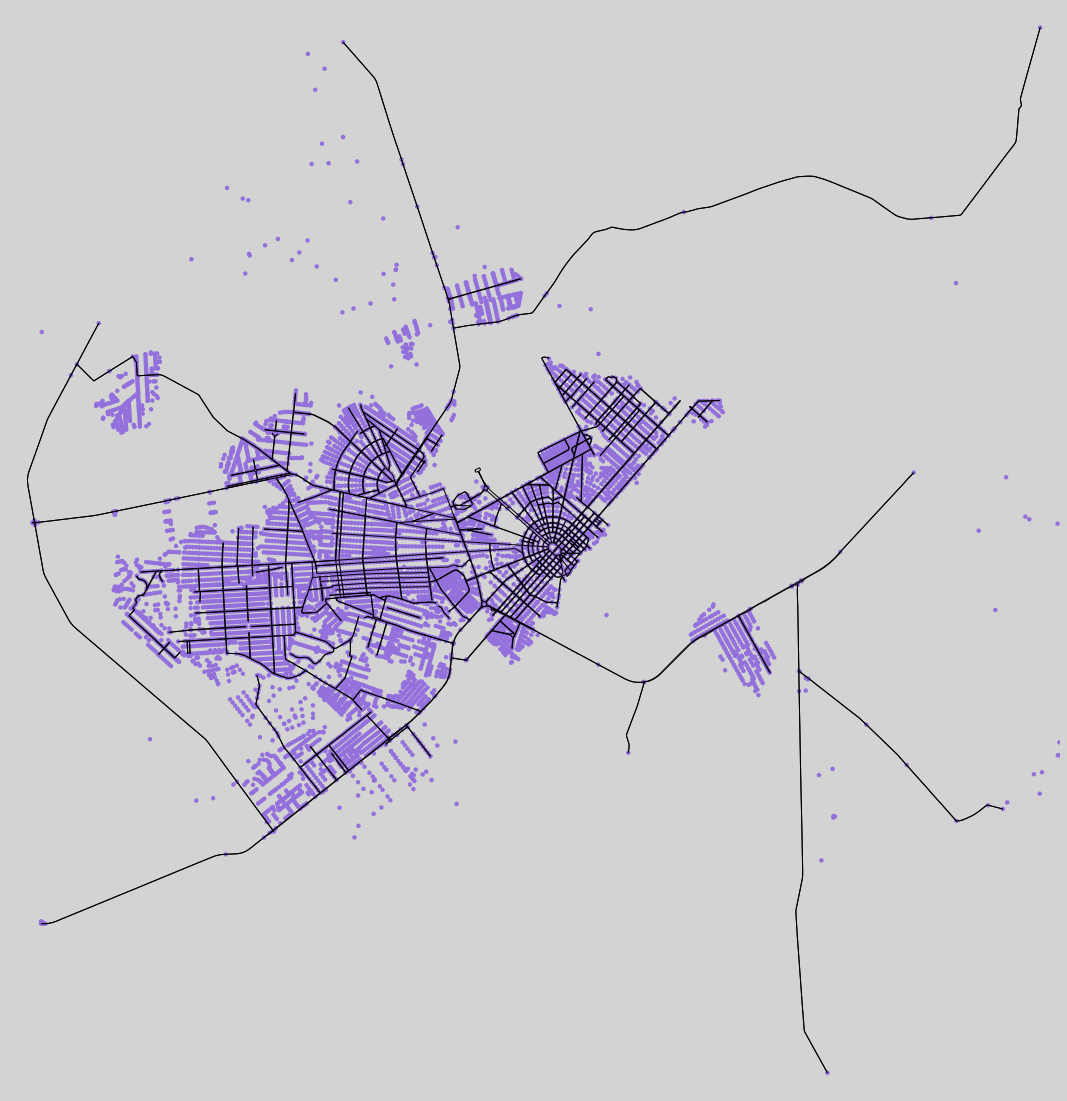

(<Figure size 1440x1440 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7efe2455b9b0>)

In [12]:
ox.plot_graph(G, fig_height=fig_height, fig_width=fig_width, edge_color=edge_color, bgcolor=bgcolor, node_color=node_color, node_size=node_size, filename="mapaFiltrado", save=True,  file_format=formato_imgs)

# Lista que receberá os caminhos encontrados pelo AG

In [13]:
listaResultadoDFS = []
tamanhoDosCiclosSalvos = []

# Lista para salvar as informações da evolução do AG para plotagem de gráfico ao final do experimento

In [14]:
PlotMinDados  = []
PlotMeanDados = []
PlotMaxDados  = []

# Controle dos ciclos

In [15]:
PlotMaioresCiclos = []
PlotMaioresCiclos.append(0)

# Listas para serem usadas com multi-thread na etapa de Fitness 

In [16]:
parada = False
tamGenes = len(listaValoresNew)
fitnesses = [(0,)]*tamPopulacao

# Busca em profundidade que encontrará os caminhos caso exista

In [17]:
def DFS_BuscaCiclo(grafo, mapa, mapaGrafo, verticeInicial, tamGrafo):
    
    import stack    
    pilha = stack.stack()
    v = verticeInicial
        
    #vetor de marcação de visitados e de elementos que estão na pilha O(1)
    visitados = []
    pilha_rec = []
    
    for i in range(tamGrafo):
        visitados.append(False)
        pilha_rec.append(False)
    
        
    it = -1
    contListaPercorrida = 0
    listaPercorrida = []
    controleMaiorCiclo = PlotMaioresCiclos[-1]
    
    #inicio da BFS
    while True:
        achou_vizinho = False        
        
        listaPercorrida.append(v)
        contListaPercorrida += 1
                
        if not visitados[ mapa[ v ] ]:
            x = mapa[ v ]
            
            pilha.empilhar( x )
            visitados[ x ] = True
            pilha_rec[ x ] = True
            
        for it in grafo[v]:
            
            #se tiver na pilha é porque possue ciclo           
            if pilha_rec[ mapa[ it ] ] and it == verticeInicial:
                
                listaArestasCiclo = []
                
                for k in listaPercorrida:
                    if pilha_rec[ mapa[ k ] ] == True:
                        listaArestasCiclo.append( k )
                        
                tamList = len( listaArestasCiclo )
                
                if tamList > controleMaiorCiclo:
                    controleMaiorCiclo = tamList
                    
                    PlotMaioresCiclos.append( controleMaiorCiclo )
                                                        
                    '''
                        Pega o ciclo para salvar
                    '''
                    
                    cicloAtual = []
                    
                    for k in range(1, len(listaArestasCiclo)):
                        cicloAtual.append( (listaArestasCiclo[k-1], listaArestasCiclo[k]) )
                    cicloAtual.append( ( listaArestasCiclo[-1], listaArestasCiclo[0] ) )
                    
                    cicloAtualList = list( cicloAtual )
                    listaResultadoDFS.append( cicloAtualList )
                    tamanhoDosCiclosSalvos.append( tamList )
                    
                else:
                    achou_vizinho = False
                    break
                    
            if not visitados[ mapa[ it ] ]:
                achou_vizinho = True
                break
                
        if not achou_vizinho:
            pilha_rec[ pilha.topo() ] = False
                
            pilha.desempilhar()
            
            if pilha.p_vazia():
                break
                
            v = mapaGrafo[ pilha.topo() ]
        
        else:
            v =  it
    
    
    # retorna a quantidade de arestas percorridas
    return contListaPercorrida

# Função que executa um filtro para remover as arestas não selecionadas pelo AG e envia a DFS para validação de rotas

In [18]:
def temCicloDFS(individuo):
    
    G_aux = G.copy()
    
    # ajuda na evolução do onemax
    if recebeAjuda == True:        
        tam = tamGenes        
        for i in range(10):            
            posicao = random.randint(0,tam-1)
            individuo[posicao] = 1
            
        
        
        
                
    #identificador da posicao do nodo centro cívico para verificar se esta ativo
    for i in range(tamGenes):
        if listaDadosNew[i][0] == nodosCentroCivico[0] and listaDadosNew[i][1] == nodosCentroCivico[1]:
            individuo[i] = 1            
            break;
            
    
    #lista para remover os nós não selecionados pelo AG
    listaRemover = []            
        
    #Seleção dos nodos não selecionados
    for i in range(len(individuo)):
        if individuo[i] == 0:
            listaRemover.append( (listaDadosNew[i][0], listaDadosNew[i][1]) )            
        
        
    #Remove os nodos não selecionados pelo AG
    G_aux.remove_edges_from( listaRemover )
    
    
    
    #listaMapa recebe os valores de [0 a totNodos]
    listaMapa = []
    for i in range(len(G_aux.nodes)):
        listaMapa.append(i)
    
    
    # 215151515 --> 10
    mapa = pd.Series(index=G_aux.nodes, data=listaMapa)
    # 10 --> 215151515
    mapaGrafo = pd.Series(G_aux.nodes)
    
    resposta = DFS_BuscaCiclo(G_aux, mapa, mapaGrafo, nodosCentroCivico[0], len(G_aux.nodes))
    
    if SelecionartipoBusca == 1:
        return np.sum(individuo)
    else:
        return resposta

# DEAP - ONEMAX

In [19]:
log_evolution_GA = []

In [20]:
import array
import random

import numpy

from deap import algorithms
from deap import base
from deap import creator
from deap import tools


creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", array.array, typecode='b', fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Attribute generator
toolbox.register("attr_bool", random.randint, 0, 1)

# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, tamGenes)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evalOneMax(individual):
    return temCicloDFS(individual),

toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=PROB_MUTACAO)
toolbox.register("select", tools.selTournament, tournsize=indCruzamento)

def main():
    random.seed(SEED_RANDOM)
    
    pop = toolbox.population(n=tamPopulacao)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    
    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=totGeracoes, 
                                   stats=stats, halloffame=hof, verbose=True)
    
    log_evolution_GA.append(log)
    
    return pop, log, hof

if __name__ == "__main__":
    main()

/home/felipe/.conda/envs/OSMNX/lib/python3.7/site-packages/deap/tools/_hypervolume/pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)


gen	nevals	avg    	std    	min 	max 
0  	50    	3516.96	38.0237	3428	3600
1  	24    	3561.9 	28.9125	3502	3623
2  	29    	3596.1 	21.2379	3540	3644
3  	28    	3619.04	17.9799	3572	3648
4  	28    	3637.38	12.1982	3604	3655
5  	28    	3640.92	19.3782	3552	3667
6  	26    	3647.9 	19.1324	3591	3678
7  	18    	3661.52	13.0342	3609	3683
8  	33    	3669.66	19.1933	3615	3712
9  	26    	3685.22	17.1829	3628	3712
10 	31    	3700.02	15.5788	3650	3725
11 	29    	3710.12	15.5559	3662	3733
12 	16    	3717.78	17.2073	3653	3737
13 	30    	3720.5 	19.3889	3655	3755
14 	39    	3728.46	22.3716	3641	3769
15 	28    	3742.32	17.4166	3662	3769
16 	31    	3749.08	20.8075	3659	3773
17 	29    	3756.58	20.2031	3690	3775
18 	33    	3766.5 	15.4496	3713	3779
19 	27    	3766.46	20.9907	3694	3779
20 	24    	3774.64	11.2938	3705	3781
21 	32    	3774.04	16.8914	3700	3781
22 	20    	3774.6 	20.3912	3681	3781
23 	29    	3779.22	8.84825	3729	3781
24 	35    	3772.04	24.8185	3678	3781
25 	28    	3777.52	14.3725	3703	3781
2

221	34    	3893.2 	18.4781	3822	3899
222	26    	3893.6 	18.7702	3811	3899
223	34    	3888.78	27.3498	3790	3899
224	30    	3890.08	27.6238	3773	3899
225	20    	3891.9 	22.5754	3786	3899
226	24    	3892.14	22.0373	3789	3899
227	27    	3893.66	21.2533	3798	3899
228	31    	3887.08	28.9032	3780	3899
229	26    	3897.88	7.84   	3843	3899
230	23    	3893.48	23.419 	3776	3899
231	26    	3892.24	22.9282	3813	3899
232	33    	3887.9 	28.4565	3793	3899
233	24    	3892.46	22.5257	3801	3899
234	20    	3894.22	19.0801	3809	3899
235	29    	3885.88	29.6436	3790	3899
236	31    	3887.18	30.0418	3761	3899
237	29    	3888.74	28.3265	3788	3899
238	33    	3887.22	30.1942	3771	3899
239	36    	3890.98	23.8113	3798	3899
240	23    	3889.64	26.2013	3794	3899
241	27    	3892.92	20.8833	3809	3899
242	34    	3890.66	24.1161	3794	3899
243	36    	3887.34	33.0119	3770	3899
244	26    	3887.54	31.3064	3790	3899
245	22    	3892.38	22.5166	3809	3899
246	35    	3886.56	33.9824	3779	3899
247	30    	3889.44	28.7758	3794	3899
2

443	21    	3891.56	25.7178	3791	3899
444	22    	3895.8 	15.8909	3806	3899
445	40    	3895.62	16.6095	3808	3899
446	35    	3892.82	24.9405	3780	3899
447	28    	3894.26	20.4047	3775	3899
448	21    	3887.12	28.84  	3789	3899
449	37    	3895.02	20.2054	3773	3899
450	26    	3891.22	24.4281	3794	3899
451	31    	3894.36	22.8191	3773	3899
452	32    	3883.74	35.8328	3788	3899
453	37    	3895.5 	14.7163	3812	3899
454	25    	3889.6 	28.933 	3777	3899
455	38    	3893.96	21.232 	3784	3899
456	31    	3887.32	29.9168	3787	3899
457	29    	3888   	30.1987	3779	3899
458	35    	3889.84	24.178 	3805	3899
459	20    	3896.62	11.6634	3838	3899
460	26    	3887.42	29.5101	3781	3899
461	31    	3890.34	26.4912	3791	3899
462	28    	3890.2 	25.8898	3766	3899
463	24    	3897.76	8.68   	3837	3899
464	27    	3883.16	32.4082	3790	3899
465	22    	3893.34	20.161 	3807	3899
466	20    	3885.44	32.0063	3781	3899
467	22    	3890.96	22.9268	3793	3899
468	33    	3891.56	25.9347	3770	3899
469	22    	3892.92	21.4521	3801	3899
4

In [21]:
log_evolution_GA

for dado in log_evolution_GA:
    for dado_i in dado:
        minimo  = int(dado_i['min'])
        media   = int(dado_i['avg'])
        maximo  = int(dado_i['max'])
        
        PlotMinDados.append(minimo)
        PlotMeanDados.append(media)
        PlotMaxDados.append(maximo)

# Gráfico da Evolução do AG dentre as gerações com máximo, média e mínimo

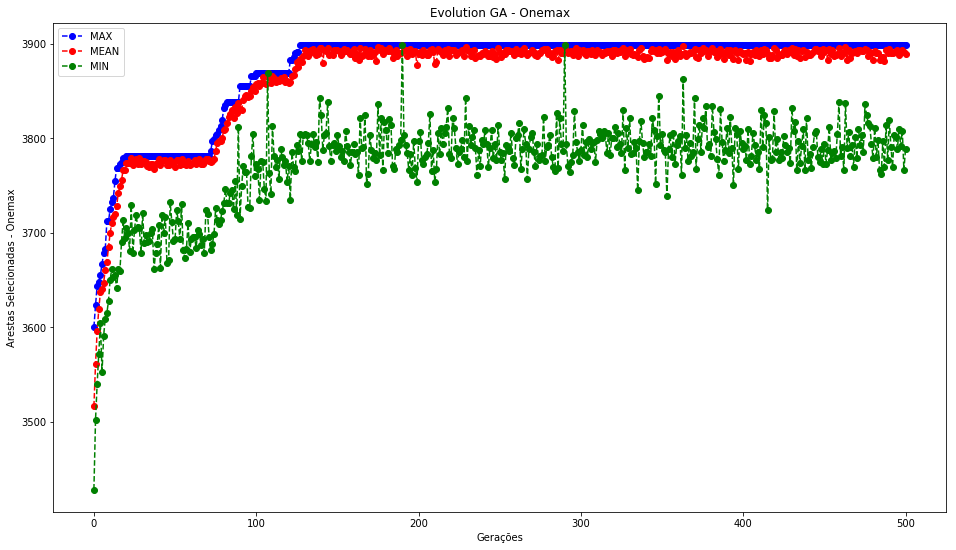

In [22]:
if SelecionartipoBusca == 1:
    # onemax
    plt.figure(figsize=(16,9))
    plt.plot(PlotMaxDados, 'ob--' , label='MAX')
    plt.plot(PlotMeanDados, 'or--' ,label='MEAN')
    plt.plot(PlotMinDados, 'og--',label='MIN')
    plt.xlabel('Gerações')
    plt.ylabel('Arestas Selecionadas - Onemax')
    plt.title('Evolution GA - Onemax')
    plt.legend(loc='upper left')
    plt.savefig("images/graficoEvolucaoOnemax.pdf",format="pdf")
    #plt.show()
else: 
    # DFS
    plt.figure(figsize=(16,9))
    plt.plot(PlotMaxDados, 'ob--' , label='MAX')
    plt.plot(PlotMeanDados, 'or--' ,label='MEAN')
    plt.plot(PlotMinDados, 'og--',label='MIN')
    plt.xlabel('Gerações')
    plt.ylabel('Arestas Selecionadas - Busca em Profundiade')
    plt.title('Evolution GA - Busca em Profundidade')
    plt.legend(loc='upper left')
    plt.savefig("images/graficoEvolucaoDFS.pdf",format="pdf")
    #plt.show()


# Evolução dos ciclos

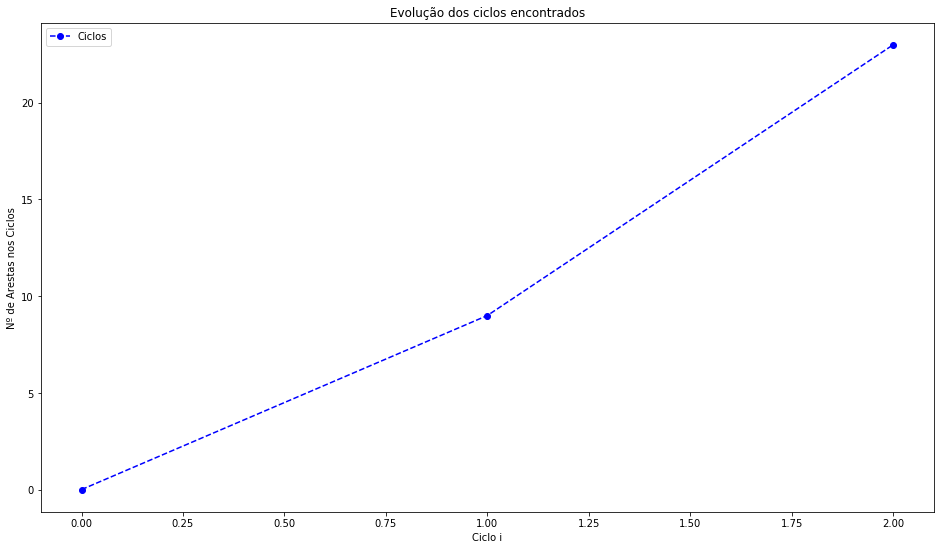

In [23]:
#
# Evolução dos ciclos encontrados
plt.figure(figsize=(16,9))
plt.plot(PlotMaioresCiclos, 'ob--' , label='Ciclos')
plt.xlabel('Ciclo i')
plt.ylabel('Nº de Arestas nos Ciclos')
plt.title('Evolução dos ciclos encontrados')
plt.legend(loc='upper left')
plt.savefig("images/GraficoTamanhoDosCiclos.pdf",format=formato_imgs)
#plt.show()

# Plotagem das rotas geradas caso tenha encontrado

In [24]:
def salvarRotaTxt(via_vez, rota):
    path = "Rotas/Rota-"+str(via_vez)+".txt"
    arq = open(path, 'w')    
    for linha in rota:
        arq.write(linha+"\n")        
    arq.close()

    
def printFormatNamesStreet( via_vez , qtd_arestas, ruas ):
    
    contador = 1
    salvarText = []
    
    # +1 por causa do retorno do ciclo da rota    
    Rota = "Rota "+str(via_vez)+" - "+str(qtd_arestas)+" Arestas:\n"
    print(Rota)
    salvarText.append(Rota)
    
    for rua in ruas:
        concat = str(rua)
        Rua = ""+str(contador)+"ª - "+concat
        print(Rua)
        salvarText.append(Rua)
        contador = contador + 1
    
    Rua = ""+str(contador)+"ª - "+ruas[0]
    print(Rua)
    salvarText.append(Rua)
    
    salvarRotaTxt(via_vez, salvarText)
        
        
def printRotaRuas(via_vez, qtd_arestas, rota ):
    '''
    print(listaDadosNew[0])
    print()
    print(listaDadosNew[0][0])
    print()
    print(listaDadosNew[0][1])
    print()
    print(listaDadosNew[0][2])
    print()
    print(listaDadosNew[0][2]['name'])
    
    [321519672, 3589971255, {'osmid': 704201746, 'oneway': True, 'name': 'Rua Coronel Pinto', 'highway': 'tertiary', 'length': 18.205}]

    321519672

    3589971255

    {'osmid': 704201746, 'oneway': True, 'name': 'Rua Coronel Pinto', 'highway': 'tertiary', 'length': 18.205}

    Rua Coronel Pinto
    
    '''
    try:
                
        tamListaDadosNew = len(listaDadosNew)
        tamRotaLista = len(rota)

        ruasRota = []
        
        '''
            Arrumar os nomes das ruas..
        '''
    
    
        for rota_i in range( tamRotaLista ):            
            for lista_i in range(tamListaDadosNew):            
                if( listaDadosNew[lista_i][0] == rota[rota_i][0] and listaDadosNew[lista_i][1] == rota[rota_i][1] ):
                    
                    if 'name' in listaDadosNew[lista_i][2]:
                        rua = listaDadosNew[lista_i][2]['name']

                        if rua not in ruasRota:
                            ruasRota.append(rua)
                            
                    else:
                        ruasRota.append("Unname")

                    '''
                    print(listaDadosNew[lista_i])
                    print(rota[rota_i])
                    print()
                    '''                    
        
        printFormatNamesStreet(via_vez, qtd_arestas, ruasRota )
        print("\n\n")
    
    except:
        print("Erro...")

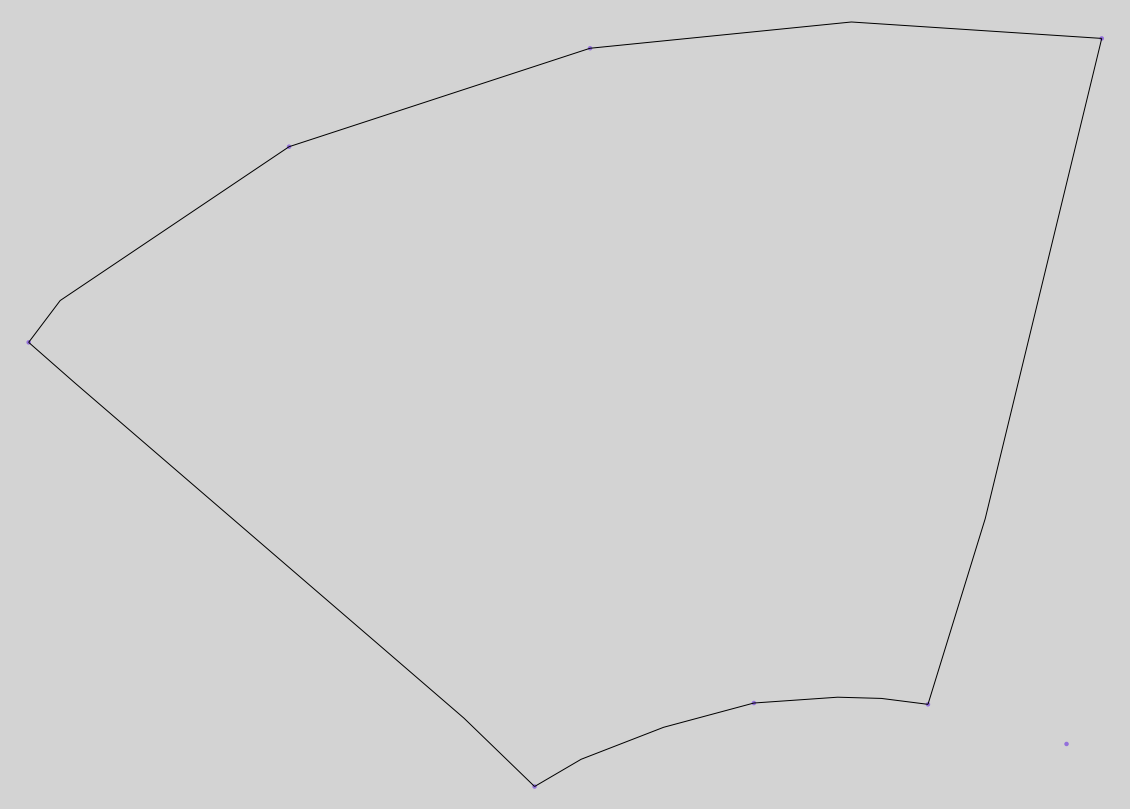



Rota 1 - 9 Arestas:

1ª - Avenida Capitão Ene Garcez
2ª - Rua Coronel Pinto
3ª - Avenida Capitão Júlio Bezerra
4ª - Avenida Amazonas
5ª - Avenida Capitão Ene Garcez





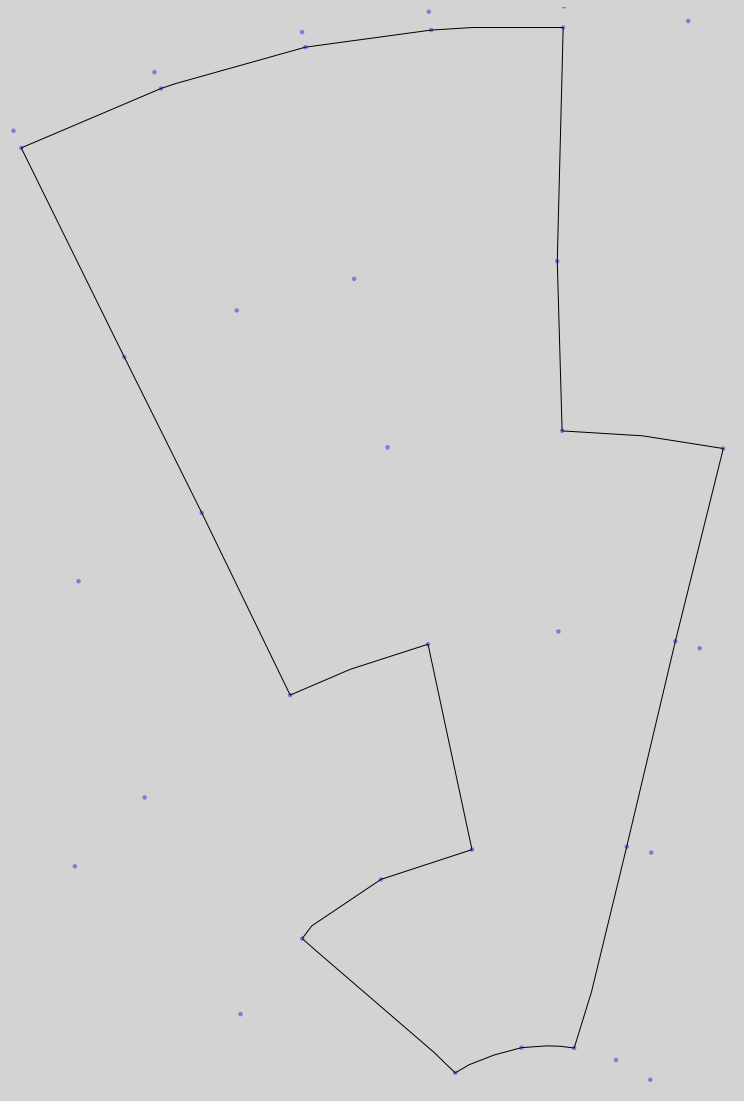



Rota 2 - 23 Arestas:

1ª - Avenida Capitão Ene Garcez
2ª - Rua Coronel Pinto
3ª - Rua Professor Agnelo Bitencourt
4ª - Rua Alfredo Cruz
5ª - Rua General Penha Brasil
6ª - Avenida Major Williams
7ª - Rua Alferes Paulo Saldanha
8ª - Rua Barão do Rio Branco
9ª - Avenida Capitão Júlio Bezerra
10ª - Avenida Amazonas
11ª - Avenida Capitão Ene Garcez





In [25]:
removerNodosFinal = []
cont=1
contador = 0
if len(listaResultadoDFS) > 0:
    for cadaCicloEncontrado in range(len(listaResultadoDFS)):
        contador = contador + 1        
        for nodos in listaDadosNew:
            v = (nodos[0], nodos[1])

            if v not in listaResultadoDFS[ cadaCicloEncontrado ]:
                removerNodosFinal.append(v)

        if len(removerNodosFinal) > 0:
            G_aux = G.copy()
            G_aux.remove_edges_from(removerNodosFinal)
            
            # para salvar
            name = "Rota-"+ str(contador)
            fig, ax = ox.plot_graph(G_aux, fig_height=fig_height, fig_width=fig_width, edge_color=edge_color, bgcolor=bgcolor, node_color=node_color, node_size=node_size, filename=name, save=True,  file_format=formato_imgs)
            
            #fig, ax = ox.plot_graph(G_aux, fig_height=30, node_color='blue', node_size=5, node_zorder=1, node_edgecolor='k', )
            print("\n")
            removerNodosFinal.clear()
            
            '''
                Imprimir ruas do trajeto
            '''
            #print(PlotMaioresCiclos)
            printRotaRuas( contador, PlotMaioresCiclos[contador] , listaResultadoDFS[cadaCicloEncontrado] )
            
        
else:
    print("Infelizmente não foi possivel encontrar uma rota....")

# FIMMM --- Obrigado